# Vector Projections — Educational Notebook

In this notebook, we explore the concept of projecting one vector onto another.
We'll cover:
- Scalar projection (a number)
- Vector projection (a vector in the same direction as the reference)
- The link to the dot product
- Orthogonality and geometric intuition

---

## 1. What is a Projection?

A **projection** is like the "shadow" of one vector onto another.

Imagine vector **S** being cast onto vector **R**.
The projection of **S** onto **R** answers the question:

> *How much of vector S lies in the direction of vector R?*

This "amount" can be:
- a **scalar** (magnitude only)
- a **vector** (with direction along R)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define vectors R and S
R = np.array([3, 1])
S = np.array([2, 4])

# Compute dot product and norms
dot_RS = np.dot(R, S)
norm_R = np.linalg.norm(R)
norm_S = np.linalg.norm(S)

# Scalar projection of S onto R
scalar_proj = dot_RS / norm_R

# Vector projection of S onto R
vector_proj = (dot_RS / norm_R**2) * R

print(f"Original vectors:")
print(f"R = {R}")
print(f"S = {S}")
print(f"Scalar projection of S onto R: {scalar_proj:.2f}")
print(f"Vector projection of S onto R: {vector_proj}")


Original vectors:
R = [3 1]
S = [2 4]
Scalar projection of S onto R: 3.16
Vector projection of S onto R: [3. 1.]


## 2. Scalar Projection

The **scalar projection** (sometimes called the *component*) of $\vec{S}$ onto $\vec{R}$ is:

$$\text{scalar\_proj} = \frac{\vec{S} \cdot \vec{R}}{\| \vec{R} \|}$$

This gives a number: how far $\vec{S}$ goes in the direction of $\vec{R}$, regardless of $\vec{R}$'s length.

---

## 3. Vector Projection

The **vector projection** of $\vec{S}$ onto $\vec{R}$ is a new vector that lies along $\vec{R}$, with length equal to the scalar projection:

$$\text{vector\_proj} = \left( \frac{\vec{S} \cdot \vec{R}}{\vec{R} \cdot \vec{R}} \right) \vec{R}$$

This is useful when we want both magnitude and direction.

### Key Difference:

- **$\|\vec{R}\|$** is the **magnitude** (length) of vector $\vec{R}$
- **$\vec{R} \cdot \vec{R}$** is the **dot product** of $\vec{R}$ with itself

### Mathematical Relationship:

$$\|\vec{R}\|^2 = \vec{R} \cdot \vec{R}$$

So: $\|\vec{R}\| = \sqrt{\vec{R} \cdot \vec{R}}$

### Example with our vectors:
- $\vec{R} = [3, 1]$
- $\|\vec{R}\| = \sqrt{3^2 + 1^2} = \sqrt{10} \approx 3.16$
- $\vec{R} \cdot \vec{R} = 3^2 + 1^2 = 10$

### Why different formulas?

1. **Scalar projection** uses $\|\vec{R}\|$ because we want the actual length/distance
2. **Vector projection** uses $\vec{R} \cdot \vec{R}$ because it's more computationally efficient (avoids the square root)

Both give the same geometric result, but the vector projection formula is preferred for numerical calculations.


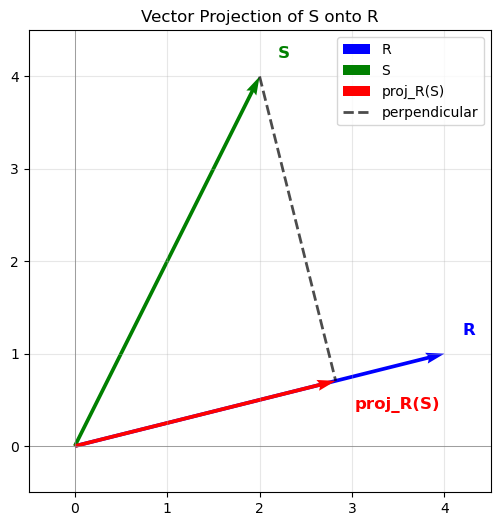

R = [4 1]
S = [2 4]
Vector projection of S onto R = [2.82352941 0.70588235]


In [8]:
# Use the original vectors from cell 1 for visualization
R = np.array([4, 1])
S = np.array([2, 4])

# Recalculate projections with the correct vectors
dot_RS = np.dot(R, S)
vector_proj = (dot_RS / np.dot(R, R)) * R

# Create a clearer visualization with the current vectors
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot original vectors with larger width and different styles
ax.quiver(0, 0, R[0], R[1], color='blue', angles='xy', scale_units='xy', scale=1, width=0.008, label='R')
ax.quiver(0, 0, S[0], S[1], color='green', angles='xy', scale_units='xy', scale=1, width=0.008, label='S')

# Plot projection
ax.quiver(0, 0, vector_proj[0], vector_proj[1], color='red', angles='xy', scale_units='xy', scale=1, width=0.008, label='proj_R(S)')

# Draw a dashed line from S to its projection to show the projection visually
ax.plot([S[0], vector_proj[0]], [S[1], vector_proj[1]], 'k--', alpha=0.7, linewidth=2, label='perpendicular')

# Add arrowheads at the tips for better visibility
ax.annotate('R', xy=(R[0], R[1]), xytext=(R[0]+0.2, R[1]+0.2), fontsize=12, color='blue', weight='bold')
ax.annotate('S', xy=(S[0], S[1]), xytext=(S[0]+0.2, S[1]+0.2), fontsize=12, color='green', weight='bold')
ax.annotate('proj_R(S)', xy=(vector_proj[0], vector_proj[1]), xytext=(vector_proj[0]+0.2, vector_proj[1]-0.3), fontsize=12, color='red', weight='bold')

# Set up the plot with better limits
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.set_aspect('equal')
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.legend()
plt.title("Vector Projection of S onto R")
ax.grid(True, alpha=0.3)
plt.show()

print(f"R = {R}")
print(f"S = {S}")
print(f"Vector projection of S onto R = {vector_proj}")


## 4. Orthogonality and Zero Projection

If the angle $\theta$ between vectors $\vec{R}$ and $\vec{S}$ is 90°, then:

$$\vec{R} \cdot \vec{S} = 0 \quad \Rightarrow \quad \text{scalar\_proj} = 0 \quad \text{and} \quad \text{vector\_proj} = \vec{0}$$

This means $\vec{S}$ has no component in the direction of $\vec{R}$.

Let's test that.


In [10]:
# Orthogonal case: R and S at 90 degrees
R = np.array([1, 0])
S = np.array([0, 2])

dot_RS = np.dot(R, S)
scalar_proj = dot_RS / np.linalg.norm(R)
vector_proj = (dot_RS / np.dot(R, R)) * R

print(f"dot(R, S) = {dot_RS} (should be 0)")
print(f"scalar projection = {scalar_proj}")
print(f"vector projection = {vector_proj}")


dot(R, S) = 0 (should be 0)
scalar projection = 0.0
vector projection = [0. 0.]


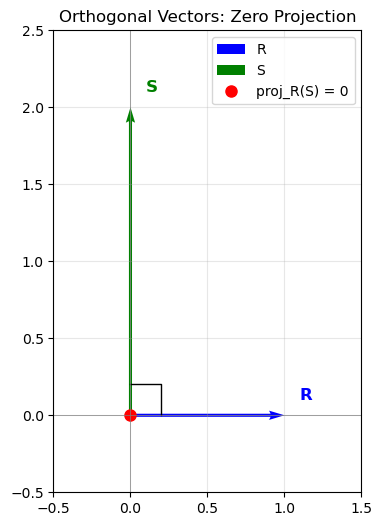

Orthogonal vectors:
R = [1 0]
S = [0 2]
Angle between them: 90°
Dot product: 0
Projection of S onto R: [0. 0.]


In [11]:
# Visualize orthogonal vectors and zero projection
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the orthogonal vectors
ax.quiver(0, 0, R[0], R[1], color='blue', angles='xy', scale_units='xy', scale=1, width=0.01, label='R')
ax.quiver(0, 0, S[0], S[1], color='green', angles='xy', scale_units='xy', scale=1, width=0.01, label='S')

# Plot the zero projection (just a point at origin)
ax.plot(0, 0, 'ro', markersize=8, label='proj_R(S) = 0')

# Add labels
ax.annotate('R', xy=(R[0], R[1]), xytext=(R[0]+0.1, R[1]+0.1), fontsize=12, color='blue', weight='bold')
ax.annotate('S', xy=(S[0], S[1]), xytext=(S[0]+0.1, S[1]+0.1), fontsize=12, color='green', weight='bold')

# Draw a right angle indicator
right_angle_size = 0.2
ax.plot([right_angle_size, right_angle_size, 0], [0, right_angle_size, right_angle_size], 'k-', linewidth=1)

# Set up the plot
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 2.5)
ax.set_aspect('equal')
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.legend()
plt.title("Orthogonal Vectors: Zero Projection")
ax.grid(True, alpha=0.3)
plt.show()

print(f"Orthogonal vectors:")
print(f"R = {R}")
print(f"S = {S}")
print(f"Angle between them: 90°")
print(f"Dot product: {dot_RS}")
print(f"Projection of S onto R: {vector_proj}")

✅ As expected, both scalar and vector projections are 0 when vectors are orthogonal.

---

## 5. Summary

| Concept             | Formula                                                   | Type      |
|---------------------|------------------------------------------------------------|-----------|
| Scalar projection   | $\frac{\vec{S} \cdot \vec{R}}{ \| \vec{R} \| }$        | Scalar    |
| Vector projection   | $\left( \frac{\vec{S} \cdot \vec{R}}{\vec{R} \cdot \vec{R}} \right) \vec{R}$ | Vector |

- Projections help us understand how much one vector contributes in the direction of another.
- They're deeply connected to the dot product.
- Useful in applications like physics, computer graphics, machine learning, and linear regression.

---

Try changing the vectors and exploring how the projections behave!
